In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from tabulate import tabulate as tab
import warnings
warnings.filterwarnings('ignore')

# Case Study: Repaying the Credit

In [2]:
df=pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [3]:
df['TARGET'].replace([0,1],['Non-Defaulters','Defaulters'],inplace=True)
df['GENDER'].replace('XNA','M',inplace=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,Defaulters,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,Non-Defaulters,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,Non-Defaulters,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,Non-Defaulters,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,Non-Defaulters,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,Non-Defaulters,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,Non-Defaulters,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,Non-Defaulters,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,Non-Defaulters,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


## Level 0 Analysis: Understanding Data

In [4]:
t1={'Columns name':df.columns,
    'Data type':df.dtypes,
    'Count of missing values':df.isnull().sum()}
print(tab(t1,headers='keys',tablefmt='psql'))

+---------------------+-------------+---------------------------+
| Columns name        | Data type   |   Count of missing values |
|---------------------+-------------+---------------------------|
| SK_ID_CURR          | int64       |                         0 |
| TARGET              | object      |                         0 |
| NAME_CONTRACT_TYPE  | object      |                         0 |
| GENDER              | object      |                         0 |
| Car                 | object      |                         0 |
| House               | object      |                         0 |
| CNT_CHILDREN        | int64       |                         0 |
| AMT_INCOME_TOTAL    | float64     |                         0 |
| AMT_CREDIT          | float64     |                         0 |
| AMT_GOODS_PRICE     | float64     |                        81 |
| NAME_TYPE_SUITE     | object      |                       405 |
| NAME_INCOME_TYPE    | object      |                         0 |
| NAME_EDU

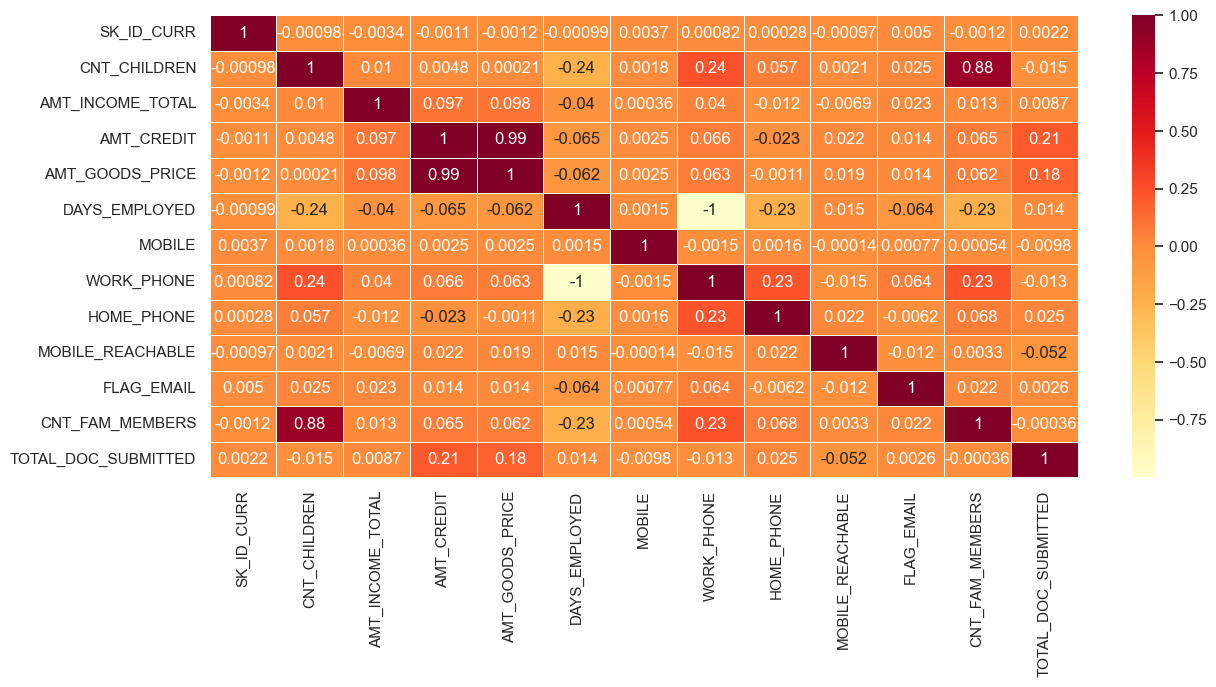

In [96]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),cbar=True,linewidths=0.5,cmap='YlOrRd',annot=True)
plt.show()

# Interpretation:

* Number closest to 1 have the strongest +ve correlation and number closest to -1 has the strongest -ve correlation.
* Credit amount & Goods price have the strongest correlation (i.e. 0.99)
* Days employed & work phone has the strongest negative correlation (i.e. -1)
* Family members & Children count also has a good correlation (i.e. 0.88)

# Level 1 Analysis: Univariate Analysis

In [7]:
def data_type(df):
    global obj, num
    obj=list(df.select_dtypes(np.object))
    num=list(df.select_dtypes(np.number))
    print(tab({'Categorical':obj,'Numerical':num},headers='keys',tablefmt='psql'))
data_type(df)

+---------------------+---------------------+
| Categorical         | Numerical           |
|---------------------+---------------------|
| TARGET              | SK_ID_CURR          |
| NAME_CONTRACT_TYPE  | CNT_CHILDREN        |
| GENDER              | AMT_INCOME_TOTAL    |
| Car                 | AMT_CREDIT          |
| House               | AMT_GOODS_PRICE     |
| NAME_TYPE_SUITE     | DAYS_EMPLOYED       |
| NAME_INCOME_TYPE    | MOBILE              |
| NAME_EDUCATION_TYPE | WORK_PHONE          |
| NAME_FAMILY_STATUS  | HOME_PHONE          |
| OCCUPATION_TYPE     | MOBILE_REACHABLE    |
| APPLICATION_DAY     | FLAG_EMAIL          |
|                     | CNT_FAM_MEMBERS     |
|                     | TOTAL_DOC_SUBMITTED |
+---------------------+---------------------+


In [8]:
cat_col=df.select_dtypes(np.object)
def info_cat(cat_col):
    table1={'Categorical Columns':cat_col.columns,
           'Unique Values':cat_col.nunique(),
           'Mode':cat_col.mode().iloc[0].tolist(),
           'Missing values':cat_col.isnull().sum()}
    print(tab(table1,headers='keys',tablefmt='psql'))
info_cat(cat_col)

+-----------------------+-----------------+-------------------------------+------------------+
| Categorical Columns   |   Unique Values | Mode                          |   Missing values |
|-----------------------+-----------------+-------------------------------+------------------|
| TARGET                |               2 | Non-Defaulters                |                0 |
| NAME_CONTRACT_TYPE    |               2 | Cash loans                    |                0 |
| GENDER                |               2 | F                             |                0 |
| Car                   |               2 | N                             |                0 |
| House                 |               2 | Y                             |                0 |
| NAME_TYPE_SUITE       |               7 | Unaccompanied                 |              405 |
| NAME_INCOME_TYPE      |               8 | Working                       |                0 |
| NAME_EDUCATION_TYPE   |               5 | Second

In [9]:
def unique_val(col):
    print(f'unique values in {col} are: \n{df[col].unique()} \n(i.e. {df[col].nunique()})')

In [10]:
unique_val('NAME_TYPE_SUITE')

unique values in NAME_TYPE_SUITE are: 
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 
(i.e. 7)


In [11]:
num_col=df.select_dtypes(np.number)
def info_num(num_col):
    table2={'Numerical Columns':num_col.columns,
            'Mean':num_col.mean(),
            'Median':num_col.median(),
            'Mode':num_col.mode().iloc[0].tolist(),
            'Standard Deviation':num_col.std(),
            'Missing values':num_col.isnull().sum()}
    print(tab(table2,headers='keys',tablefmt='psql'))
info_num(num_col)

+---------------------+--------------+----------+--------+----------------------+------------------+
| Numerical Columns   |         Mean |   Median |   Mode |   Standard Deviation |   Missing values |
|---------------------+--------------+----------+--------+----------------------+------------------|
| SK_ID_CURR          | 158006       |   157877 | 100002 |       33481.2        |                0 |
| CNT_CHILDREN        |      0.41739 |        0 |      0 |           0.721014   |                0 |
| AMT_INCOME_TOTAL    | 169426       |   144000 | 135000 |      383501          |                0 |
| AMT_CREDIT          | 599003       |   513040 | 450000 |      402052          |                0 |
| AMT_GOODS_PRICE     | 538345       |   450000 | 450000 |      369398          |               81 |
| DAYS_EMPLOYED       |  67209.1     |     2203 | 365243 |      139013          |                0 |
| MOBILE              |      0.99999 |        1 |      1 |           0.00316228 |          

In [12]:
#Filling the null values with there forward values
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

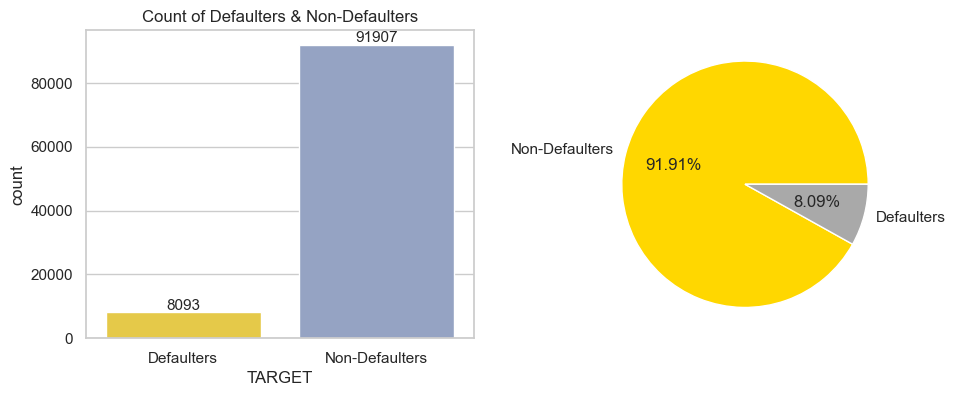

In [44]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(1,2,figsize=(11,4))
ax[0].set_title('Count of Defaulters & Non-Defaulters')
per=df['TARGET'].value_counts()
#target=['Non-Defaulters','Defaulters']
ax=sns.countplot(data=df,x='TARGET',ax=ax[0],palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',colors=['#FFD700','darkgrey'])
plt.show()

## Interpretation:
#### Here Target 1 means clients who are having payment difficulties, he/she had late payment more than X days on at least one of the first Y installments of the loan in the sample, and Target 0 means all the other cases.
### So, Target 1 clients have the higher probability of becoming a defaulter

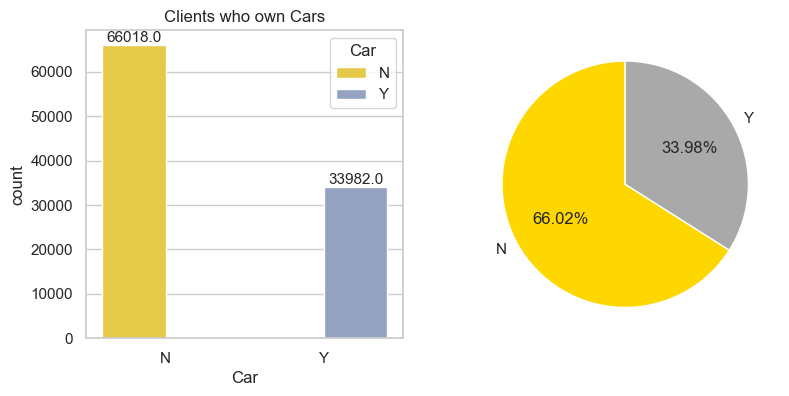

In [52]:
fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].set_title('Clients who own Cars')
per=df['Car'].value_counts()
ax=sns.countplot(data=df,x='Car',hue='Car',ax=ax[0],palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
#ax.legend(['No','Yes'])
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['#FFD700','darkgrey'])
plt.show()

## Interpretation:
### The clients who doesn't owns a car chould be a reason of their being a defaulter, it's possible that after getting the loan approved they may purchase a car with all the loan amount they got and then fails to make payments on a debt.

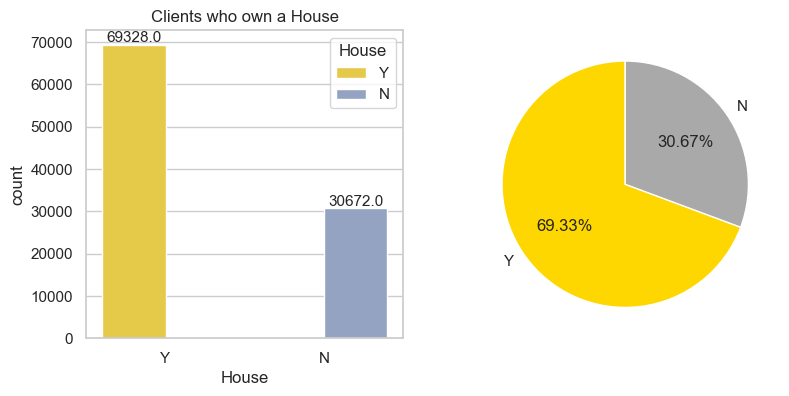

In [51]:
fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].set_title('Clients who own a House')
per=df['House'].value_counts()
ax=sns.countplot(data=df,x='House',hue='House',ax=ax[0],palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
#ax.legend(['Yes','No'])
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['#FFD700','darkgrey'])
plt.show()

## Interpretation:
### The clients who doesn't owns a House chould be a reason of their being a defaulter, it's possible that after getting the loan approved they may purchase a House with all the loan amount they got and then fails to make payments on a debt.

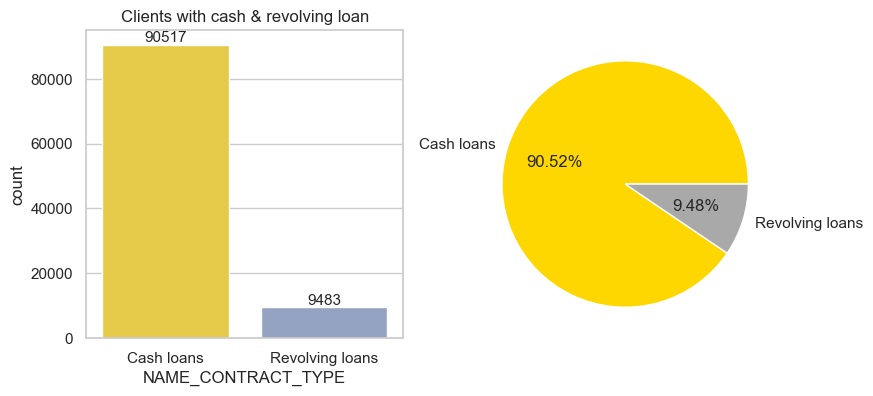

In [48]:
fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].set_title('Clients with cash & revolving loan')
per=df['NAME_CONTRACT_TYPE'].value_counts()
ax=sns.countplot(data=df,x='NAME_CONTRACT_TYPE',ax=ax[0],palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',colors=['#FFD700','darkgrey'])
plt.show()

## Interpretation:
### Revolving loans are more riskier than the Cash loans because they do not require collateral in other hand cash loans are typically secured, which means that the client is required to put up collateral, such as a car or home, to secure the loan. This provides the lender with a tangible asset that they can seize in the event of default, which helps to mitigate the risk of loss.
## So, here there're 9483 Clients (i.e. 9.48%) that have higher probability of becoming a defaulter.

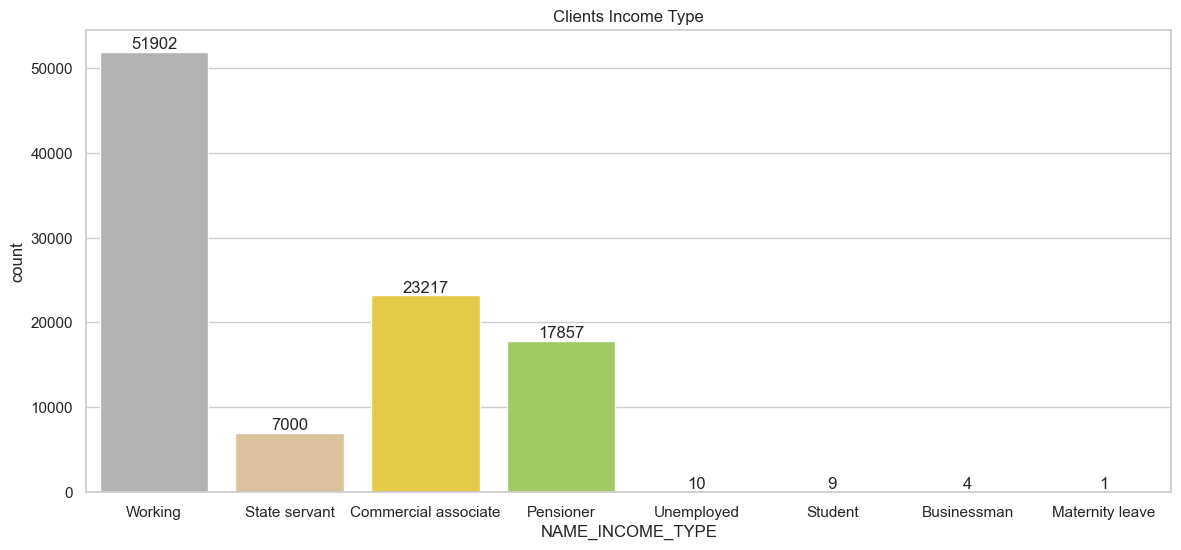

In [53]:
fig,ax=plt.subplots(figsize=(14,6))
ax.set_title('Clients Income Type')
ax=sns.countplot(data=df,x='NAME_INCOME_TYPE',palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.show()

## Interpretation:
### Here, we can see there're 17857 Pensioner who have higher probability of becoming a defaulter because as a pensioner does not necessarily indicate their ability or willingness to repay their debts. Factors such as income, expenses, and credit history are all important in determining whether a person is likely to repay a loan on time.

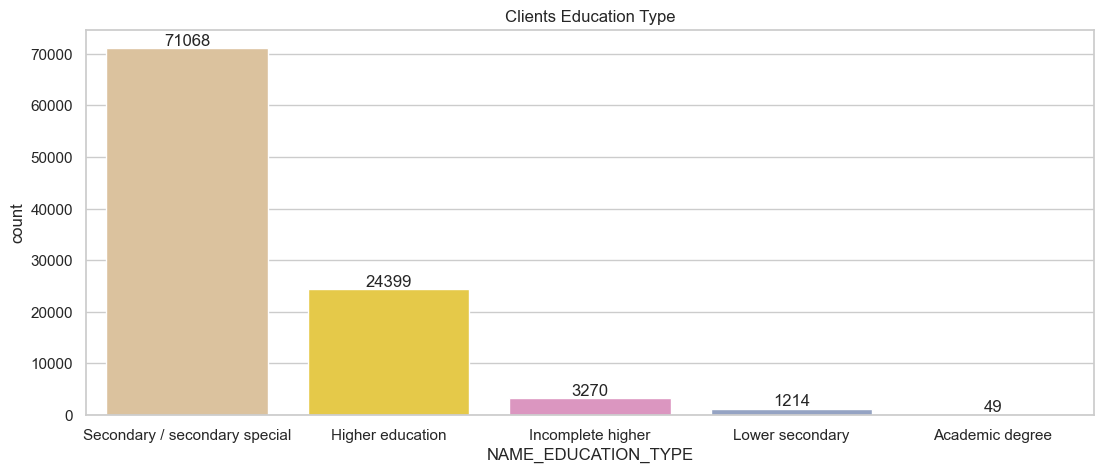

In [54]:
fig,ax=plt.subplots(figsize=(13,5))
ax.set_title('Clients Education Type')
ax=sns.countplot(data=df,x='NAME_EDUCATION_TYPE',palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
### Here, we can see there’re 71068 Secondary/Secondary special Educational Clients who are the highest in the data and on other hand the  Academic degree Clients are the least in the data who are only 49.

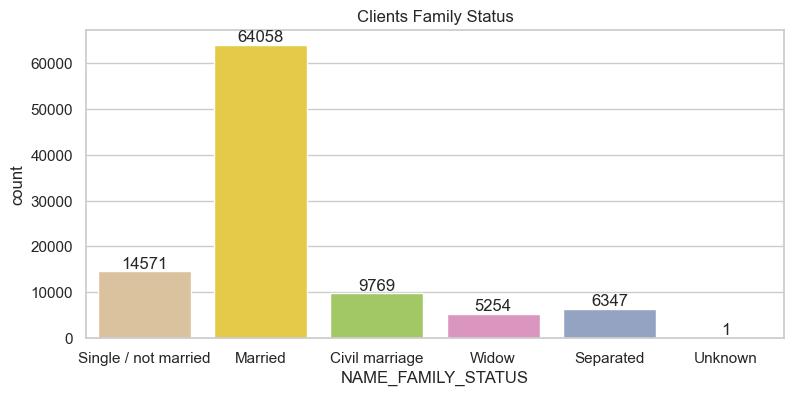

In [56]:
fig,ax=plt.subplots(figsize=(9,4))
ax.set_title('Clients Family Status')
ax=sns.countplot(data=df,x='NAME_FAMILY_STATUS',palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.show()


# Interpretation:
### Married clients are most in data and widow are least

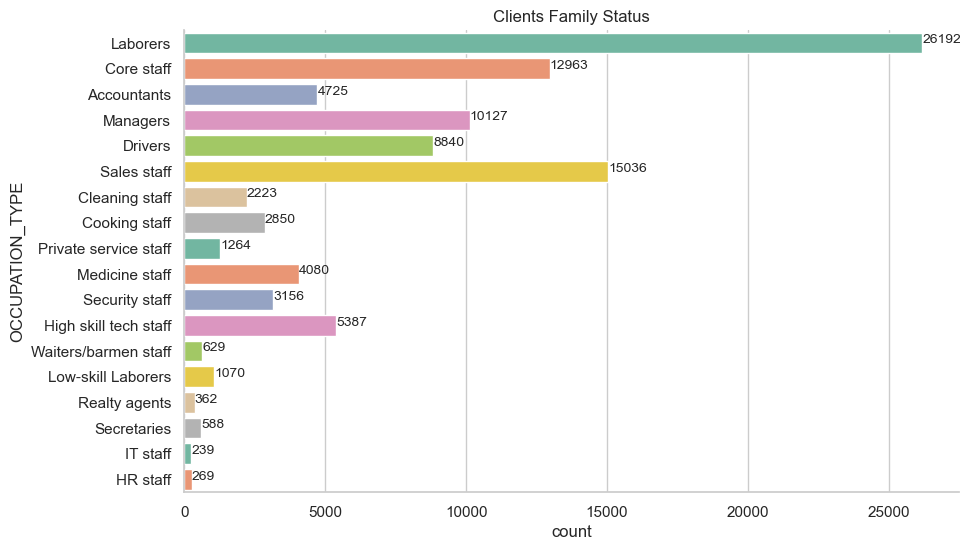

In [58]:
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title('Clients Family Status')
ax=sns.countplot(data=df,y='OCCUPATION_TYPE',palette='Set2')
for bar in ax.patches:
    count=bar.get_width()
    x=bar.get_x()+bar.get_width()+1
    y=bar.get_y()+bar.get_height()/2
    ax.annotate(str(count),(x,y),fontsize=10)
sns.despine()
plt.show()

# Interpretation:
### Laboreres are most and IT Staffs are least

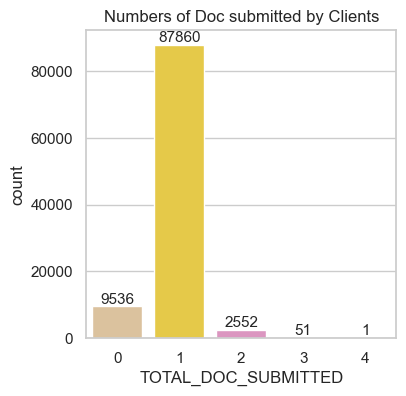

In [59]:
fig,ax=plt.subplots(figsize=(4,4))
ax.set_title('Numbers of Doc submitted by Clients')
sns.countplot(data=df,x='TOTAL_DOC_SUBMITTED',palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.show()

# Interpretation:
### Document submitted 1 are most in count

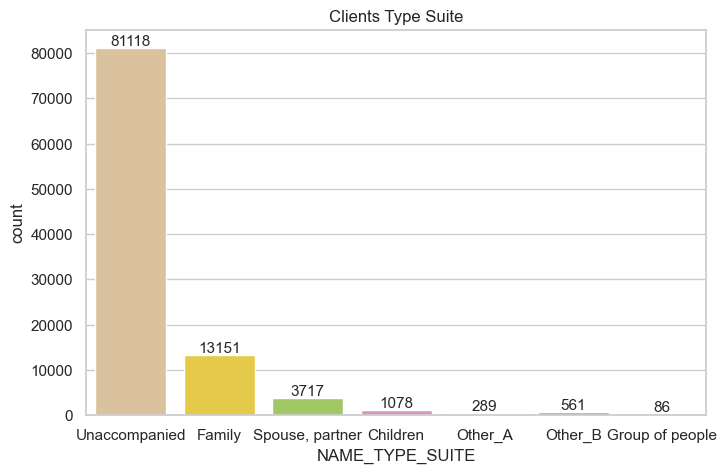

In [60]:
fig,ax=plt.subplots(figsize=(8,5))
ax.set_title('Clients Type Suite')
sns.countplot(data=df,x='NAME_TYPE_SUITE',palette='Set2_r')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.show()

# Interpretation:
## Unaccompanied clients are most in the data

# Level 2 Analysis: Bivariate Analysis

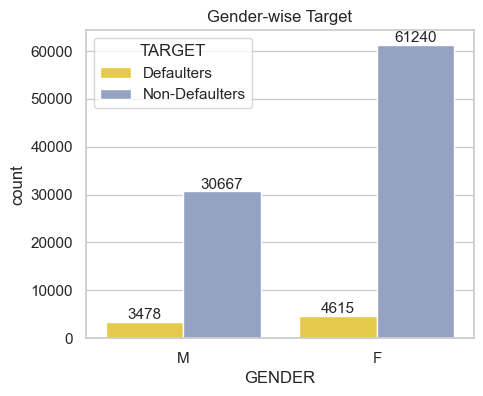

In [62]:
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.countplot(data=df,x='GENDER',hue='TARGET',palette='Set2_r')
ax.set_title('Gender-wise Target')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.show()

# Interpretation:
### So, the number of Female clients who are Non-Defaulters are the highest in data while Male who are Defaulters are the least i.e. 3478 clients.


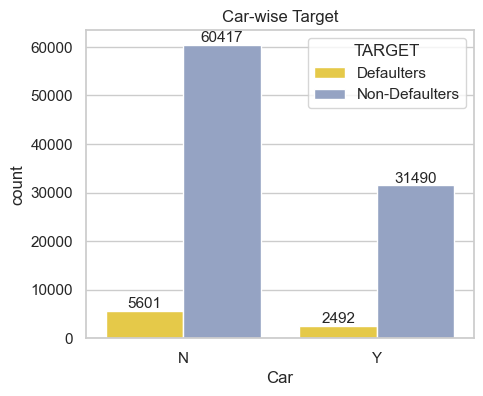

In [63]:
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.countplot(data=df,x='Car',hue='TARGET',palette='Set2_r')
ax.set_title('Car-wise Target')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.show()

# Interpretation:
### We can see the Defaulters count is more where client doesn’t own a Car than of clients having a Car


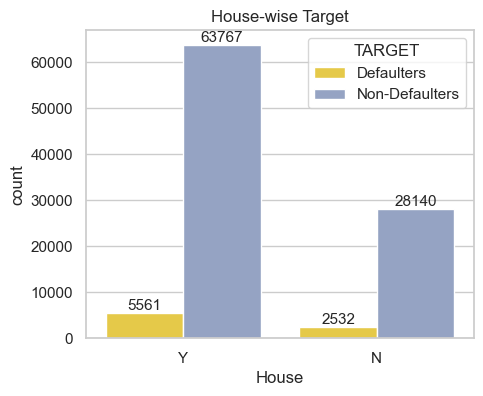

In [64]:
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.countplot(data=df,x='House',hue='TARGET',palette='Set2_r')
ax.set_title('House-wise Target')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.show()

# Interpretation:
### But in second chart the output is just opposite Defaulters are more in count where client owns a House and less in count where client doesn’t own a House.


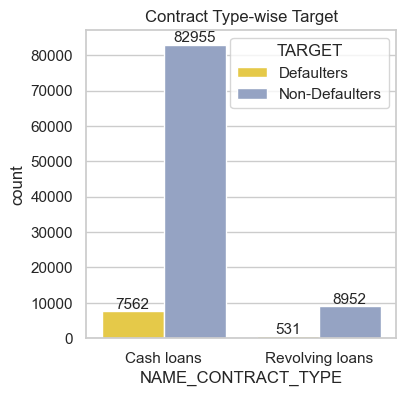

In [65]:
fig,ax=plt.subplots(figsize=(4,4))
ax=sns.countplot(data=df,x='NAME_CONTRACT_TYPE',hue='TARGET',palette='Set2_r')
ax.set_title('Contract Type-wise Target')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center",fontsize=11)
plt.show()

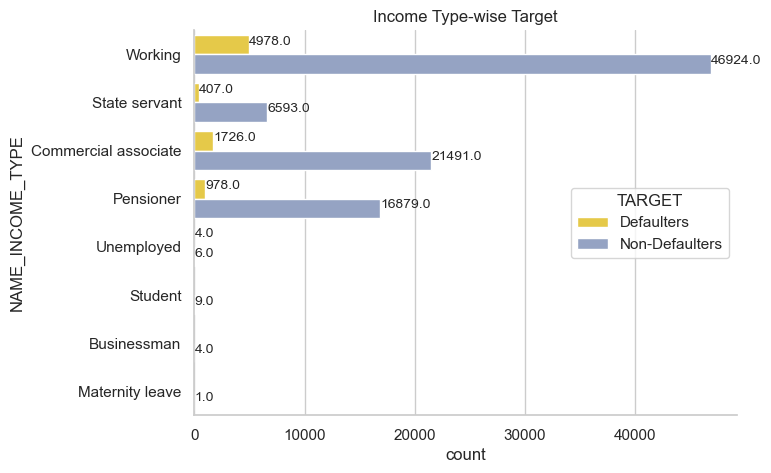

In [66]:
fig,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(data=df,y='NAME_INCOME_TYPE',hue='TARGET',palette='Set2_r')
ax.set_title('Income Type-wise Target')
for bar in ax.patches:
    count=bar.get_width()
    x=bar.get_x()+bar.get_width()+1
    y=bar.get_y()+bar.get_height()/2
    ax.annotate(str(count),(x,y),fontsize=10)
sns.despine()
plt.show()

# Interpretation:
### Working clients have the most number of Defaulters as well as Non-Defaulters and as there are very less number of clients in below 4 types so we can neglect them. According to that least number of Defaulters are in State servant type i.e. 407 clients. 


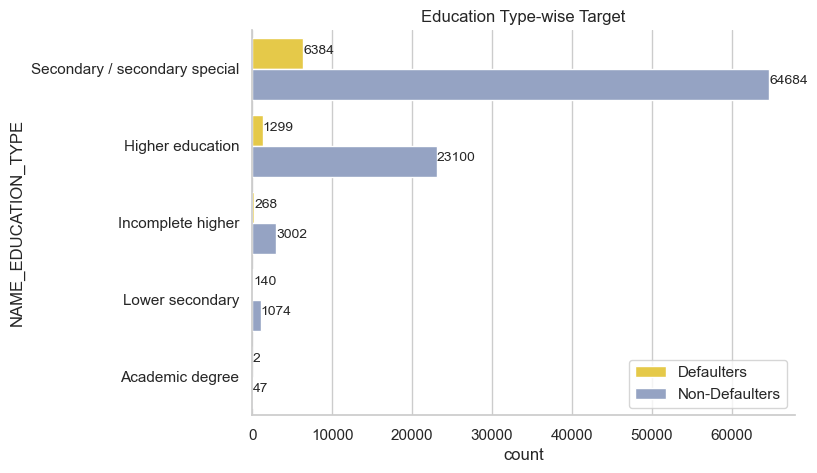

In [67]:
fig,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(data=df,y='NAME_EDUCATION_TYPE',hue='TARGET',palette='Set2_r')
ax.set_title('Education Type-wise Target')
for bar in ax.patches:
    count=bar.get_width()
    x=bar.get_x()+bar.get_width()+1
    y=bar.get_y()+bar.get_height()/2
    ax.annotate(str(count),(x,y),fontsize=10)
ax.legend(loc='lower right')
sns.despine()
plt.show()

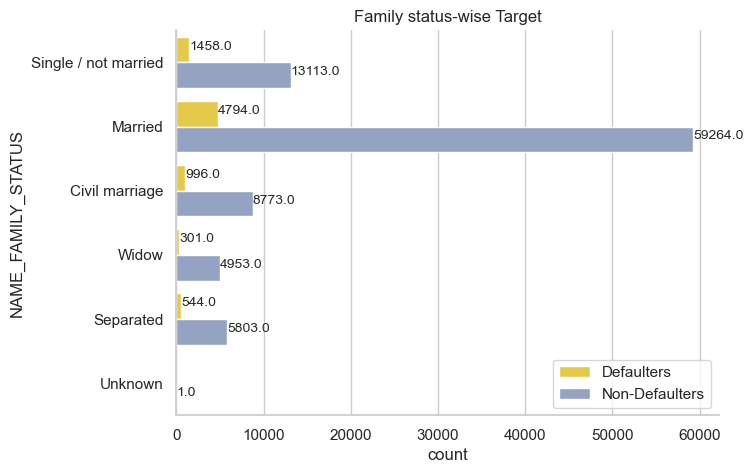

In [68]:
fig,ax=plt.subplots(figsize=(7,5))
ax=sns.countplot(data=df,y='NAME_FAMILY_STATUS',hue='TARGET',palette='Set2_r')
ax.set_title('Family status-wise Target')
for bar in ax.patches:
    count=bar.get_width()
    x=bar.get_x()+bar.get_width()+1
    y=bar.get_y()+bar.get_height()/2
    ax.annotate(str(count),(x,y),fontsize=10)
ax.legend(loc='lower right')
sns.despine()
plt.show()

# Interpretation:
### The Secondary/Secondary special Education type has the most number of Defaulters as well as Non-Defaulters and Academic degree Education type has the least number of Defaulters. 


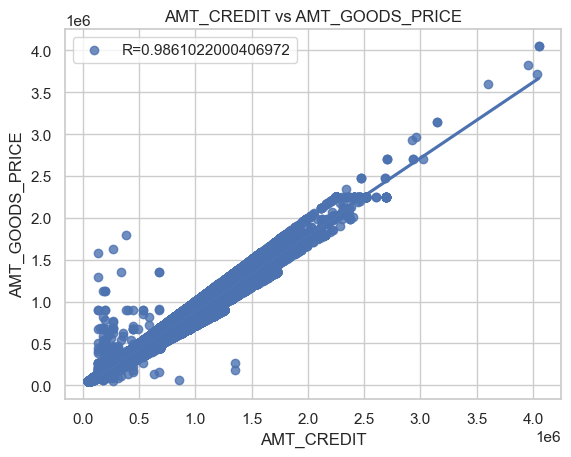

In [70]:
cor=df['AMT_CREDIT'].corr(df['AMT_GOODS_PRICE'])
sns.regplot(data=df,x='AMT_CREDIT',y='AMT_GOODS_PRICE',label='R='+str(cor))
plt.title('AMT_CREDIT vs AMT_GOODS_PRICE')
plt.legend()
plt.show()

# Interpretation:
### Here we can see there’s strong positive correlation between Credit amount and amount Goods price i.e. 0.98, as the Credit amount is increasing the amount Goods price is also increasing 


# Level 3 Analysis: Multiriate Analysis

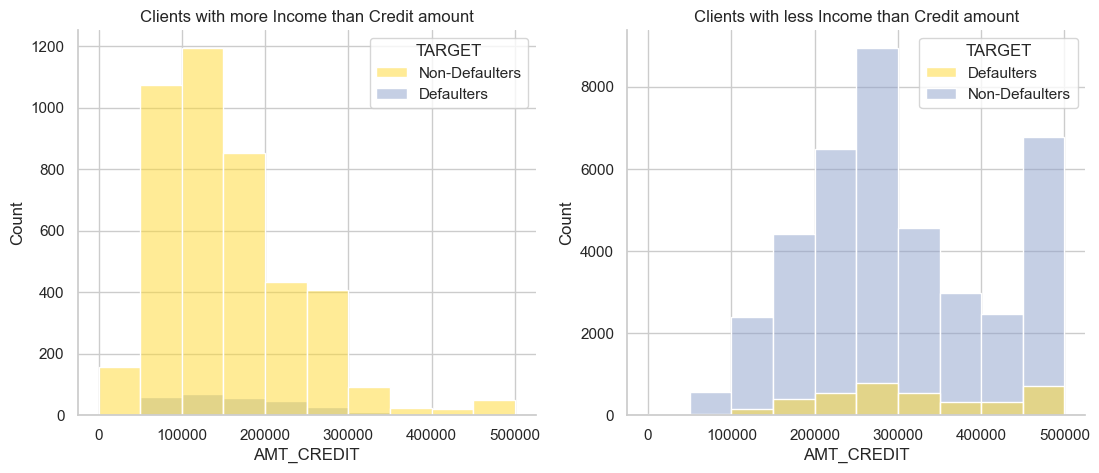

In [105]:
inc_more=df[df.AMT_INCOME_TOTAL>df.AMT_CREDIT]
inc_less=df[df.AMT_INCOME_TOTAL<df.AMT_CREDIT]
bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000]
fig,ax=plt.subplots(1,2,figsize=(13,5))
sns.histplot(data=inc_more,hue='TARGET',x='AMT_CREDIT',bins=bins,ax=ax[0],palette='Set2_r')
ax[0].set_title('Clients with more Income than Credit amount')
sns.histplot(data=inc_less,hue='TARGET',x='AMT_CREDIT',bins=bins,palette='Set2_r')
ax[1].set_title('Clients with less Income than Credit amount')
sns.despine()
plt.show()

# Interpretation:
### In first chart we can see the Non-Defaulter clients with more income than the Credit amount are most in count from 100k-200k of Credit amount while in second chart the Non-Defaulter clients are most between 250k & 300k of credit amount.


In [73]:
d_nd=df.groupby('TARGET')[['AMT_INCOME_TOTAL','AMT_CREDIT']].mean().reset_index()
d_nd

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT
0,Defaulters,174765.078216,556688.460460
1,Non-Defaulters,168955.936428,602729.552042


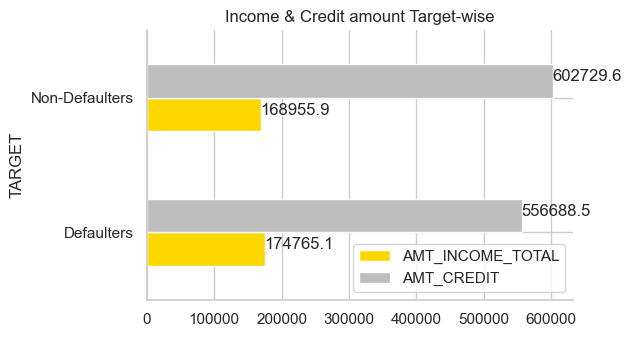

In [83]:
ax=d_nd.plot.barh(x='TARGET',figsize=(5.5,3.5),color=['#FFD700','#BDBDBD'])
plt.title('Income & Credit amount Target-wise')
for bar in ax.patches:
    count=round(bar.get_width(),1)
    x=bar.get_x()+bar.get_width()+1
    y=bar.get_y()+bar.get_height()/2
    ax.annotate(str(count),(x,y))
sns.despine()
plt.show()

# Interpretation:
### So, the Credit amount of Non-Defaulters is the highest that is around 602.7k and we can see the income amount for both Non-defaulters and Defaulters are almost equal between 168k to 175k


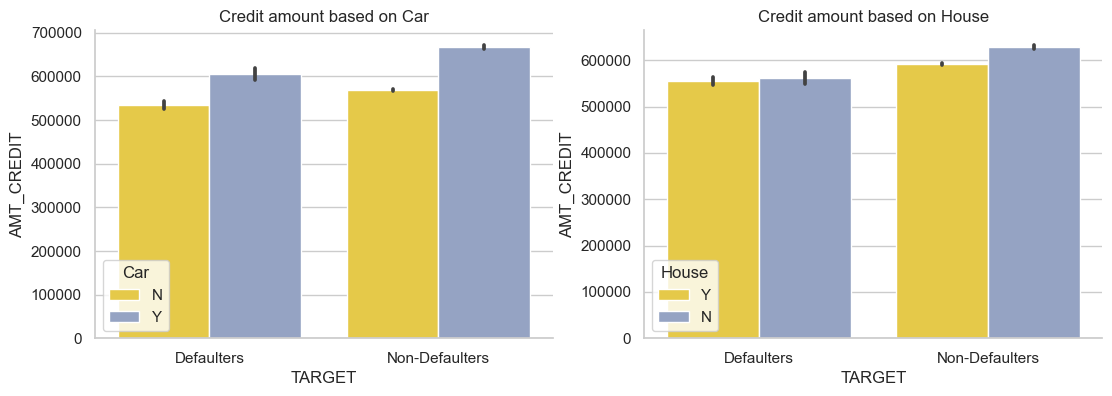

In [86]:
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Credit amount based on Car')
sns.barplot(x='TARGET',y='AMT_CREDIT',hue='Car',data=df,ax=ax[0],palette='Set2_r')
ax[1].set_title('Credit amount based on House')
sns.barplot(x='TARGET',y='AMT_CREDIT',hue='House',data=df,palette='Set2_r')
sns.despine()
plt.show()

# Interpretation:
### Here we can see the Non-Defaulter clients who own a car have the highest Credit amount and the Defaulter clients who doesn’t own a car have the lowest Credit amount.
### In second chart we can see that the Non-Defaulter clients who doesn’t own a House have the highest Credit amount and the Defaulter clients who own a House have the lowest Credit amount.


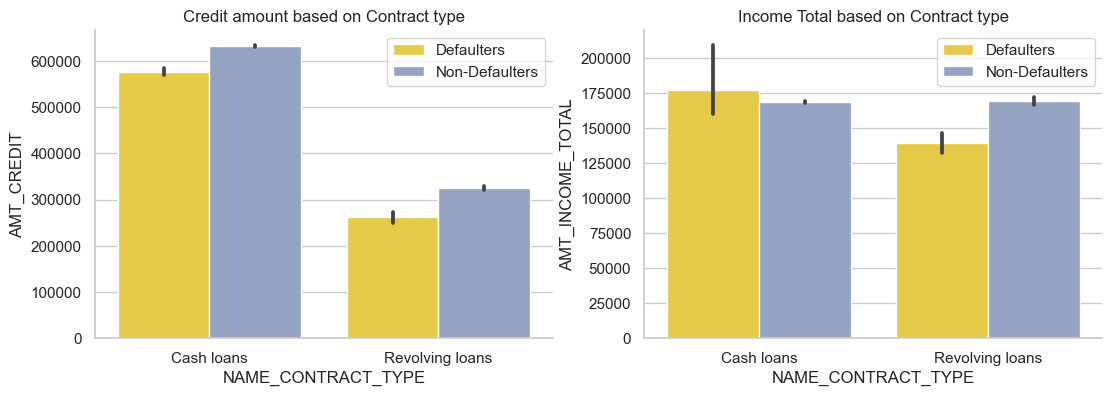

In [87]:
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Credit amount based on Contract type')
sns.barplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',hue='TARGET',data=df,ax=ax[0],palette='Set2_r')
ax[0].legend(loc='upper right')
ax[1].set_title('Income Total based on Contract type')
sns.barplot(x='NAME_CONTRACT_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET',data=df,palette='Set2_r')
ax[1].legend(loc='upper right')
sns.despine()
plt.show()

# Interpretation:
### Here we can see the Non-Defaulter clients with the Cash loans have the highest Credit amount and the Defaulter clients with Revolving loans have the lowest Credit amount.
### In second chart we can see that the Non-Defaulter has the similar income amount in both the loan cases while the Defaulter clients with Revolving loans have the lowest income amount.
